# CommandMap Gamification Analysis : The "No Game" Pilot



In [31]:
import pandas as pd
import sqlite3
import seaborn as sns


MY_DATA_PATH = "./data/noGuide.db"

TRIAL_TABLE_NAME = "table_trialLog"
DEMOGRAPHICS = "questionnaire_demographics"
MOTIVATION_SHORT_ONE = "questionnaire_motivation_short"
MOTIVATION_SHORT_DUPLICATE = "questionnaire_motivation_short_duplicate"
MOTIVATION = "questionnaire_motivation"
PARTICIPANT = "participant"
PROGRESS = "progress"


## Read in the data

In [32]:
connection = sqlite3.connect(MY_DATA_PATH)
cursor = connection.cursor()

# reading all table names
table_list = [a for a in cursor.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

print("Your database contains the following tables:")
print(table_list)

TRIAL_DATA = pd.read_sql_query(f"SELECT *FROM {TRIAL_TABLE_NAME}", connection)
DEMOGRAPHICS = pd.read_sql_query(f"SELECT * FROM {DEMOGRAPHICS}", connection)
MOTIVATION_SHORT_ONE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_ONE}", connection)
NOTIVATION_SHORT_DUPLICATE = pd.read_sql_query(f"SELECT * FROM {MOTIVATION_SHORT_DUPLICATE}", connection)
MOTIVATION = pd.read_sql_query(f"SELECT * FROM {MOTIVATION}", connection)
PARTICIPANT = pd.read_sql_query(f"SELECT * FROM {PARTICIPANT}", connection)
PROGRESS = pd.read_sql_query(f"SELECT * FROM {PROGRESS}", connection)

connection.close()

Your database contains the following tables:
[('participant',), ('progress',), ('radio_grid_log',), ('display',), ('session_store',), ('questionnaire_motivation_short_duplicate',), ('questionnaire_motivation',), ('questionnaire_preferences',), ('questionnaire_prolific_start',), ('questionnaire_motivation_short',), ('questionnaire_demographics',), ('table_trialLog',), ('table_streamLog',)]


## Preprocessing

Of the participants who did not abandon the study, one participant timed out and another reported technical issues. There were additional records in the database generated from testing the study on the server. All of these are removed before analysis. 

After removing unusable data, there are 10 participants. 

In [33]:
# IDs 1-3: Testing
# IDs 5, 8, 13: Technical issue, did not finish, timeout

IDS_TO_REMOVE = [1, 2, 3, 5, 8, 13]

TRIAL_DATA = TRIAL_DATA[~TRIAL_DATA["participantID"].isin(IDS_TO_REMOVE)]
DEMOGRAPHICS = DEMOGRAPHICS[~DEMOGRAPHICS["participantID"].isin(IDS_TO_REMOVE)]
MOTIVATION_SHORT_ONE = MOTIVATION_SHORT_ONE[~MOTIVATION_SHORT_ONE["participantID"].isin(IDS_TO_REMOVE)]
NOTIVATION_SHORT_DUPLICATE = NOTIVATION_SHORT_DUPLICATE[~NOTIVATION_SHORT_DUPLICATE["participantID"].isin(IDS_TO_REMOVE)]
MOTIVATION = MOTIVATION[~MOTIVATION["participantID"].isin(IDS_TO_REMOVE)]
PARTICIPANT = PARTICIPANT[~PARTICIPANT["participantID"].isin(IDS_TO_REMOVE)]
PROGRESS = PROGRESS[~PROGRESS["participantID"].isin(IDS_TO_REMOVE)]



## Demographic Data Overview


All participants were familiar with Micosoft applications and did not have colour vision deficiency. One participant reported that they did not have normal visual ability but declined to specify the nature of their visual disability. 

In [34]:
DEMOGRAPHICS[["microsoftFamiliarity", "visionAbility", "CVD", "visionAblilityType"]]

,microsoftFamiliarity,visionAbility,CVD,visionAblilityType
1,Yes,Yes,No,
3,Yes,Yes,No,
4,Yes,Yes,No,
5,Yes,No,No,
6,Yes,Yes,No,
7,Yes,Yes,No,
9,Yes,No,No,
11,Yes,Yes,No,
12,Yes,Yes,No,
13,Yes,Yes,No,


The participants consisted of 8 women and 2 men. 

<AxesSubplot:xlabel='gender', ylabel='Count'>

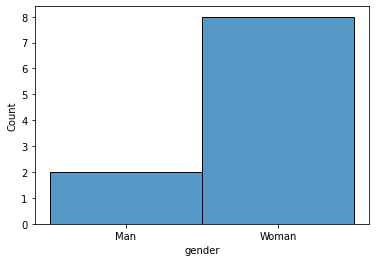

In [35]:


sns.histplot(DEMOGRAPHICS["gender"])

Ages of participants ranged from 22 to 72.

<AxesSubplot:xlabel='age', ylabel='Count'>

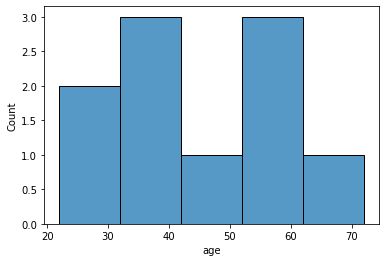

In [36]:
DEMOGRAPHICS['age'].max()
DEMOGRAPHICS['age'].min()

sns.histplot(DEMOGRAPHICS["age"])

In [37]:
DEMOGRAPHICS["occupation"]

1                Retail Manager
3                retail manager
4                    Unemployed
5                       manager
6                   Real Estate
7                Events manager
9                      Designer
11       assistant psychologist
12                      manager
13    Community Care Supervisor
Name: occupation, dtype: object

Many participants spent a fair amount of time using a computer (most were roughly between 55 and 65 hours a week.) All were familiar with Microsoft applications.

<AxesSubplot:xlabel='compUsage', ylabel='Count'>

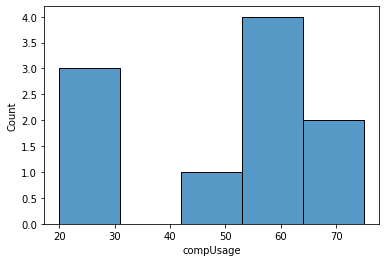

In [38]:
sns.histplot(DEMOGRAPHICS['compUsage'])

Generally, the participants were not big gamers, but most spent some of their time gaming. Six participants play games less than 3 hours per week, with three reporting that they do not generally spend time playing video games.  

In [39]:
DEMOGRAPHICS['videoGameUsage']

1      6
3      1
4      3
5     15
6      2
7      0
9      0
11     1
12     5
13     0
Name: videoGameUsage, dtype: int64

<AxesSubplot:xlabel='videoGameUsage', ylabel='Count'>

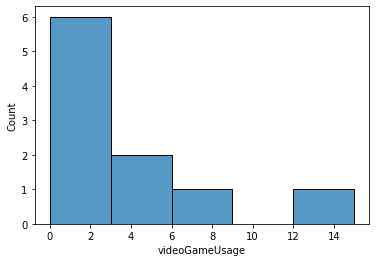

In [40]:
sns.histplot(DEMOGRAPHICS['videoGameUsage'])

## Initial Motivational Survey



In [41]:
MOTIVATION.columns

Index(['motivationID', 'participantID', 'tag', 'timeStarted', 'timeEnded',
       'boring_task', 'enjoyable_task', 'satisfied_performance',
       'couldnt_do_well', 'effort_task', 'didnt_try_hard', 'felt_tense',
       'relaxed_task', 'help_memorize_commands', 'ability_matched_difficulty',
       'attention', 'interesting_things', 'genuine_pride',
       'intuitive_controls', 'total_control', 'time_alter',
       'aware_performance', 'no_effort_focus', 'not_worried_performance',
       'spontaneous_automatic', 'goals_defined', 'MentalDemand',
       'PhysicalDemand', 'TemporalDemand', 'Performance', 'Effort',
       'Frustration', 'Accuracy', 'Speed', 'LearningEffort', 'Learning'],
      dtype='object')

<AxesSubplot:xlabel='boring_task', ylabel='Count'>

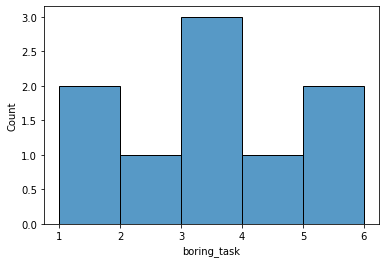

In [44]:


MOTIVATION['boring_task'] = MOTIVATION['boring_task'].astype('int64')
MOTIVATION['boring_task'] = MOTIVATION['boring_task'].replace('1 (Strongly Disagree)', 1)

sns.histplot(data=MOTIVATION, x="boring_task")

In [46]:
MOTIVATION['enjoyable_task'].unique

<bound method Series.unique of 1                      5
3     7 (Strongly Agree)
4                      2
5                      4
6                      5
7                      2
8                      2
10                     6
12                     5
Name: enjoyable_task, dtype: object>

<AxesSubplot:xlabel='enjoyable_task', ylabel='Count'>

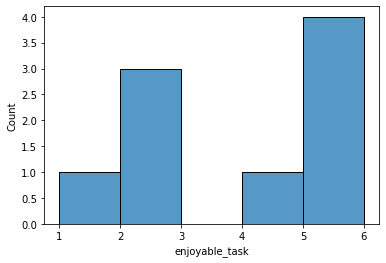

In [47]:
MOTIVATION['enjoyable_task'] = MOTIVATION['enjoyable_task'].replace('7 (Strongly Agree)', '1')
MOTIVATION['enjoyable_task'] = MOTIVATION['enjoyable_task'].astype('int64')

sns.histplot(MOTIVATION["enjoyable_task"])

<AxesSubplot:xlabel='satisfied_performance', ylabel='Count'>

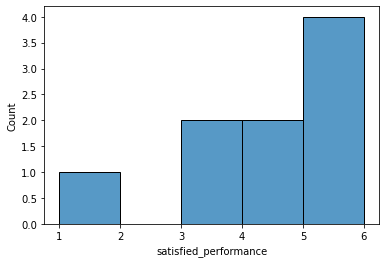

In [49]:
MOTIVATION['satisfied_performance'] = MOTIVATION['satisfied_performance'].replace('7 (Strongly Agree)', '1')
MOTIVATION['satisfied_performance'] = MOTIVATION['satisfied_performance'].replace('1 (Strongly Disagree)', '1')
MOTIVATION['satisfied_performance'] = MOTIVATION['satisfied_performance'].astype('int64')

sns.histplot(MOTIVATION["satisfied_performance"])